### 1) About the Dataset 
        This dataset captures user engagement metrics from an online course platform, facilitating analyses on factors influencing course completion. It includes user demographics, course-specific data, and engagement metrics.

![](https://th.bing.com/th/id/OIP.I2bfsoLuVJsv2RKo1OPyEQHaE7?pid=ImgDet&w=192&h=128&c=7&dpr=1.5)

### 2) Defining the AIM :
    Our Main AIM to analysie all the feature and based on behaivour of feature we need to predict weather the person will complete their courses or Not

### 3) Some Information about the dataset:
  
* **UserID**: Unique identifier for each user  .
* **CourseCategory**: Category of the course taken by the user (e.g., Programming, Business, Arts).
  * **TimeSpentOnCourse**: Total time spent by the user on the course in hours.
  * **NumberOfVideosWatched**: Total number of videos watched by the user.
  * **NumberOfQuizzesTaken**: Total number of quizzes taken by the user.
  * **QuizScores**: Average scores achieved by the user in quizzes (percentage).
  * **CompletionRate**: Percentage of course content completed by the user.
  * **DeviceType**: Type of device used by the user (Device Type: Desktop (0) or Mobile (1)).
  * **CourseCompletion (Target Variable)**: Course completion status (0: Not Completed, 1: Completed).

**Target:**
**Distribution of the Target Variable (CourseCompletion):**

* **0 (Not Completed)**: 48%
* **1 (Completed)**: 52%
ompleted): 52%

### 4) Importing the Standard Libraries.

In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy.stats as sts

### 5) Loading the Dataset

In [53]:
df = pd.read_csv('Dataset/online_course_engagement_data.csv')

In [54]:
df.head()

,UserID,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,5618,Health,29.979719,17,3,50.365656,20.860773,1,0
1,4326,Arts,27.802640,1,5,62.615970,65.632415,1,0
2,5849,Arts,86.820485,14,2,78.458962,63.812007,1,1
3,4992,Science,35.038427,17,10,59.198853,95.433162,0,1
4,3866,Programming,92.490647,16,0,98.428285,18.102478,0,0


### 6) Gattering Some Information About the Dataset

In [55]:
df.shape

(9000, 9)

**Observation-:** The dataset is containing 9000 records with 9 columns 

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   UserID                 9000 non-null   int64  
 1   CourseCategory         9000 non-null   object 
 2   TimeSpentOnCourse      9000 non-null   float64
 3   NumberOfVideosWatched  9000 non-null   int64  
 4   NumberOfQuizzesTaken   9000 non-null   int64  
 5   QuizScores             9000 non-null   float64
 6   CompletionRate         9000 non-null   float64
 7   DeviceType             9000 non-null   int64  
 8   CourseCompletion       9000 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 632.9+ KB


**Observation-:** the dataset having some columns like userid , courseCategory and much more... but we can observed that the userid is not that much important at all. , and the CourseCategory columns which contains that values like which category student belongs to and this columns containing the object values which we can compute latter on.

### EDA: Let's perform some EDA on the dataset

In [57]:
##### checking the missing values 
df.isnull().sum()

UserID                   0
CourseCategory           0
TimeSpentOnCourse        0
NumberOfVideosWatched    0
NumberOfQuizzesTaken     0
QuizScores               0
CompletionRate           0
DeviceType               0
CourseCompletion         0
dtype: int64

**Observation -:** There Having No Missing Value in the data.

In [58]:
### Droping the UserID 
df = df.drop('UserID', axis =1)

In [59]:
### Let's Observed the CourseCatrogy
df.CourseCategory.value_counts()  * 100/ len(df)

CourseCategory
Business       20.411111
Health         20.233333
Science        20.155556
Programming    20.111111
Arts           19.088889
Name: count, dtype: float64

**Observation:-** The Dataset Having 5 Category Business , Health , Science , Programming and Arts And All the Category the Equally Distributed on data

### Descripective Analysis

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TimeSpentOnCourse,9000.0,50.163822,28.491750,1.005230,25.440548,49.818417,75.069924,99.992558
NumberOfVideosWatched,9000.0,10.024667,6.029878,0.000000,5.000000,10.000000,15.000000,20.000000
NumberOfQuizzesTaken,9000.0,5.090556,3.157762,0.000000,2.000000,5.000000,8.000000,10.000000
QuizScores,9000.0,74.706028,14.378383,50.005119,62.283451,74.743294,87.022663,99.994984
CompletionRate,9000.0,50.340146,28.950977,0.009327,25.653614,50.264124,75.572493,99.979711
DeviceType,9000.0,0.500667,0.500027,0.000000,0.000000,1.000000,1.000000,1.000000
CourseCompletion,9000.0,0.396444,0.489186,0.000000,0.000000,0.000000,1.000000,1.000000


**Observation-:** We can see the average **TimeSpentOnCourse** on App is 50, **NumberofVideosWatched** on App is 10. wheraas maximum NumberofQuizzes 
attemped is 10 also the min quizscore is 50.

In [61]:
df_copy = df.copy()

## Let's Create the Machine Learning Model

### let's make data into x and y

In [62]:
X = df_copy.drop('CourseCompletion', axis =1 ) 
y = df_copy['CourseCompletion']

### Spliting the Data into Train Test Split

In [63]:
### Importing the Standard Libraries
from sklearn.model_selection import train_test_split

In [64]:
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state = 42 , test_size = 0.20)

###### Outliers Check Into Dataset 

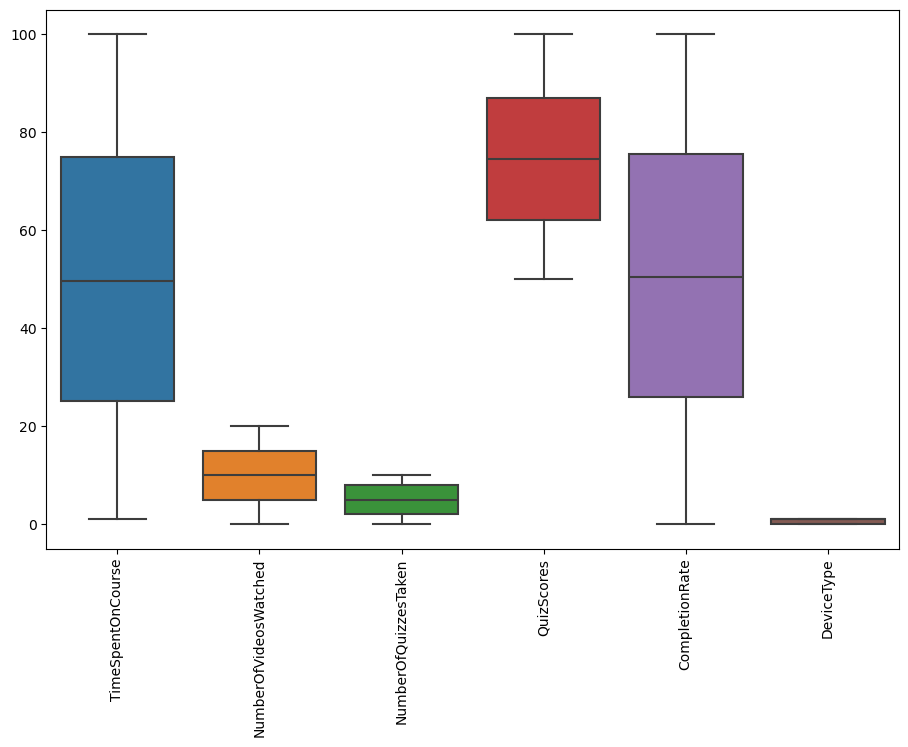

In [65]:
### Let's check the data containing any outliers or not
plt.figure(figsize = (11,7))
sns.boxplot(x_train)
plt.xticks(rotation =90)
plt.show()

**Observation-:** We Can Observed that There is No Outliers is the dataset as we can see. But One Think we can observed that the Dataset is not in the same form so we need to perform **Feature Scaling Technique** to do data in the same form.

#####  OneHotEncoding
Let's Convert the CourseCategory (categorical feature) into (Numberical Feature) using **OneHotEncoding**

In [66]:
### import the standard libraries
from sklearn.preprocessing import OneHotEncoder

In [67]:
num_feature = X.select_dtypes(exclude='object')
oh_transformer = X.select_dtypes(include = 'object')
mms = MinMaxScaler()
ohe = OneHotEncoder()

In [68]:
import pickle
import pandas
def Encoder_transform(x_train_ , x_test_):

    encoded_train = pd.get_dummies(x_train_[['CourseCategory']], prefix='CourseCategory', dtype=int)
    x_train_ = x_train_.drop('CourseCategory', axis=1).join(encoded_train)
    

    encoded_test = pd.get_dummies(x_test_[['CourseCategory']], prefix='CourseCategory', dtype= int)
    x_test_ = x_test_.drop('CourseCategory', axis=1).join(encoded_test)

    return x_train_ , x_test_
    


In [69]:
x_train_scaled , x_test_scaled = Encoder_transform(x_train, x_test)
x_train_scaled

,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCategory_Arts,CourseCategory_Business,CourseCategory_Health,CourseCategory_Programming,CourseCategory_Science
6317,24.259908,2,8,93.052714,80.625655,1,0,0,0,0,1
740,68.330860,8,3,64.562007,79.176881,1,0,0,0,1,0
3781,21.476874,20,10,70.341810,67.480511,1,0,0,0,1,0
7850,53.945297,3,2,68.345896,76.826089,1,0,0,0,0,1
2963,19.445361,19,6,61.214899,98.869957,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5734,2.898118,14,6,67.296564,67.509869,0,0,1,0,0,0
5191,21.853914,8,9,92.811514,49.894893,1,0,1,0,0,0
5390,31.372634,5,5,71.606162,6.835050,1,0,1,0,0,0
860,91.566782,2,5,95.120374,70.980378,0,0,1,0,0,0


In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
def MMS_Scaling_transform(x_train_ , x_test_):
    mms = MinMaxScaler()
    x_train_.iloc[:,0:5] = mms.fit_transform(x_train_.iloc[:,0:5])
    x_test_.iloc[:,0:5] = mms.transform(x_test_.iloc[:,0:5])
    
    f= open('feature engineering model/MMS_SCALER.pkl' , 'wb')
    pickle.dump(mms, f)
    f.close()
    return x_train_ , x_test_

In [72]:
x_train_scaled , x_test_scaled = MMS_Scaling_transform(x_train_scaled, x_test_scaled)

**Obsevation:-** We have scaled down our all column into suitable format we performed the MinMaxScaler for the Values which was not in same unit and we also change the categorical format data into Numberical through Encoding Technique Which is know as OneHotEncoding.

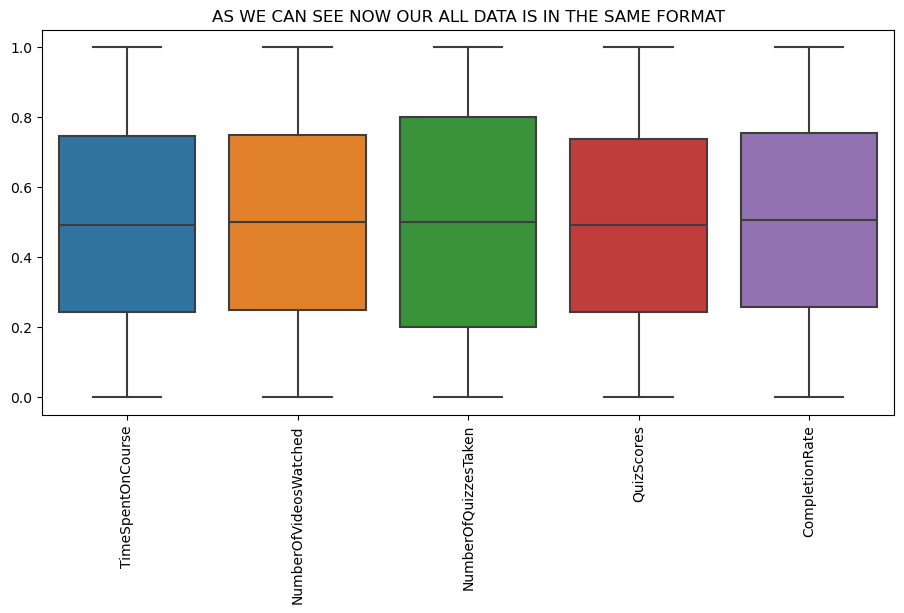

In [73]:
plt.figure(figsize = (11,5))
plt.title("AS WE CAN SEE NOW OUR ALL DATA IS IN THE SAME FORMAT")
sns.boxplot(x_train_scaled.iloc[:,0:5])
plt.xticks(rotation =90)
plt.show()

### Generating the Model

In [90]:
x_test.columns

Index(['CourseCategory', 'TimeSpentOnCourse', 'NumberOfVideosWatched',
       'NumberOfQuizzesTaken', 'QuizScores', 'CompletionRate', 'DeviceType'],
      dtype='object')

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lr = LogisticRegression()
lr

LogisticRegression()

#### Let's Perform Some Hyperperameter Tunning of the Model

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
#### Selecting the best Perameter 
perameter = {'penalty':['l1','l2'],
             'C' : np.logspace(-3,3,10),
             'solver' : ['newton-cg', 'lbfgs', 'liblinear']}

In [78]:
#### Import the Standard Libraries
from sklearn.model_selection import GridSearchCV

In [79]:
gsv = GridSearchCV(lr, param_grid= perameter , scoring = 'accuracy', cv = 10)
gsv

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [80]:
gsv.fit(x_train_scaled, y_train)

c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\AnshSrivastav\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Li

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             scoring='accuracy')

In [81]:
#### My Model Accuract 
gsv.best_score_

0.8012499999999999

In [82]:
### The Best Perameter Get Selected For 
gsv.best_estimator_

LogisticRegression(C=0.46415888336127775, penalty='l1', solver='liblinear')

### Now Let's Add this Perameter into Our Model

In [83]:
lr = LogisticRegression(C=0.46415888336127775, penalty='l1', solver='liblinear')

In [84]:
lr.fit(x_train_scaled, y_train)

LogisticRegression(C=0.46415888336127775, penalty='l1', solver='liblinear')

In [85]:
y_test_pred = lr.predict(x_test_scaled)

**Observation-:** We have predict the test output using ML model now let's check the Accuracy and Con Confusion Metrics

### Metrix

In [86]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [87]:
print(confusion_matrix(y_test ,y_test_pred), "\n")
print(classification_report(y_test, y_test_pred))
print(f"The Accuracy Score With Respect to Test Data is : {accuracy_score(y_test , y_test_pred)}")

[[910 158]
 [219 513]] 

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1068
           1       0.76      0.70      0.73       732

    accuracy                           0.79      1800
   macro avg       0.79      0.78      0.78      1800
weighted avg       0.79      0.79      0.79      1800

The Accuracy Score With Respect to Test Data is : 0.7905555555555556


In [88]:
f = open('model_file/MODEL.pkl','wb')
pickle.dump(lr, f)
f.close()

#### **Observation-:** As We can see we having the good model with train accuracy 80% and test with 79% it's Good model to do prediction.

In [93]:
with open('feature engineering model/OneHot.pkl', 'rb') as mms_file:
    Ohe = pickle.load(mms_file)
    mms_file.close()

In [116]:
df[df['CourseCompletion'] == 0]

,CourseCategory,TimeSpentOnCourse,NumberOfVideosWatched,NumberOfQuizzesTaken,QuizScores,CompletionRate,DeviceType,CourseCompletion
0,Health,29.979719,17,3,50.365656,20.860773,1,0
1,Arts,27.802640,1,5,62.615970,65.632415,1,0
4,Programming,92.490647,16,0,98.428285,18.102478,0,0
6,Health,78.908724,10,2,86.836533,22.588896,1,0
7,Business,12.068237,16,3,61.553646,27.410991,1,0
...,...,...,...,...,...,...,...,...
8991,Science,27.665242,8,10,55.217584,42.558240,0,0
8995,Health,37.445225,14,4,54.469359,32.990704,1,0
8996,Science,48.631443,7,7,59.413257,0.254625,0,0
8997,Health,38.212512,3,3,69.508297,70.188159,1,0
